# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In this file, any code section with [Experiment] before it, is a branch of the workflow that explores the proper workflow, and should be skipped in the main (final) workflow. They are here to show how I attempted the project.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import transform
import random
import cv2
%matplotlib inline
import tensorflow as tf

In [2]:
# Get training and testing data
training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

train_coords = train['coords']
train_sizes = train['sizes']
valid_coords = valid['coords']
valid_sizes = valid['sizes']
test_coords = test['coords']
test_sizes = test['sizes']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape
Height,Width,Channel = X_train[0].shape
# TODO: How many unique classes/labels there are in the dataset.
yclasses = np.unique(y_train)
n_classes = len(yclasses)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## An exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Data exploration visualization code goes here.
Feel free to use as many code cells as needed.

##### Appreciation of each class

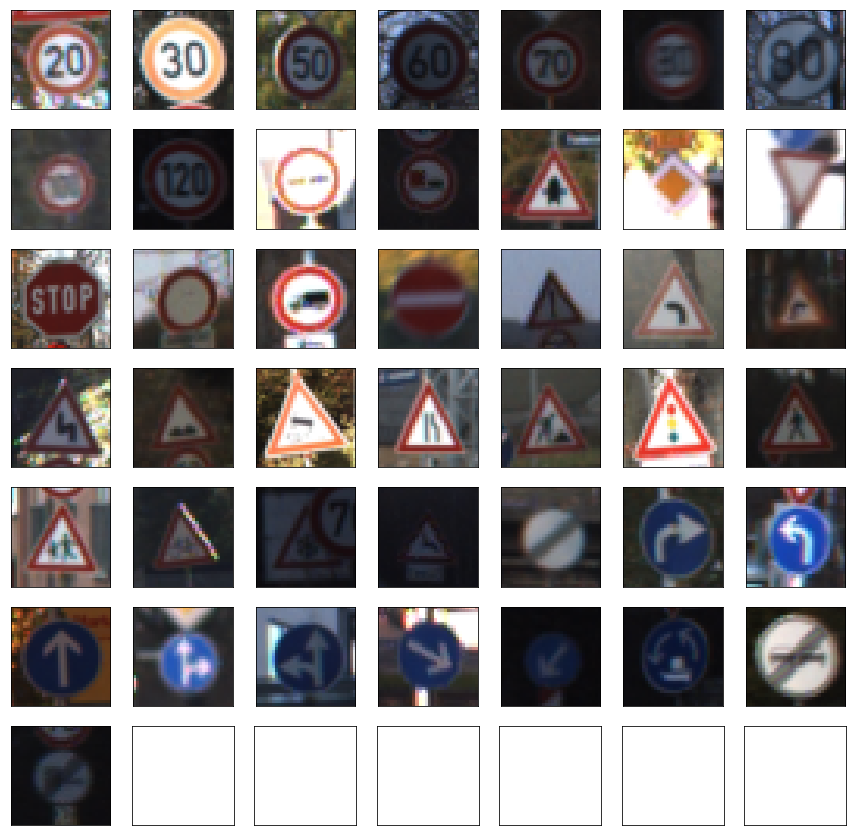

In [4]:
nclassperRow = 7
nRow = 7
fig, axarr = plt.subplots(nRow,nclassperRow, figsize=(15,15))
for i in range(nRow):
    for j in range(nclassperRow):
        classnum = i*nclassperRow+j        
        if classnum<n_classes:
            samples = X_train[y_train==classnum,...]
            index = random.randint(0,len(samples)-1)    
            axarr[i,j].imshow(samples[index])
        axarr[i,j].axes.get_xaxis().set_visible(False)
        axarr[i,j].axes.get_yaxis().set_visible(False)
fig.savefig('datasetall.png')

Distributions of 43 classes in the training set, validation set, and test set are calculated. As is seen, the training set is more unbalanced for each class than the other sets. Supplementary data is needed to balance the dataset to correctly classify the iamges.

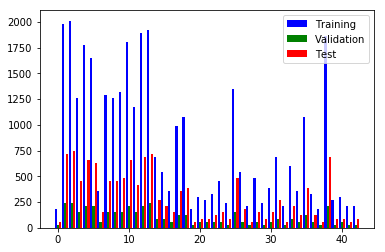

array([ 180, 1980, 2010, 1260, 1770, 1650,  360, 1290, 1260, 1320, 1800,
       1170, 1890, 1920,  690,  540,  360,  990, 1080,  180,  300,  270,
        330,  450,  240, 1350,  540,  210,  480,  240,  390,  690,  210,
        599,  360, 1080,  330,  180, 1860,  270,  300,  210,  210])

In [6]:
fig, ax = plt.subplots()
w = 0.3
x = yclasses
binedges = np.append(np.unique(y_train),n_classes)
histtrain, bintrain = np.histogram(y_train,binedges)
ax.bar(x-w, histtrain, width=w, color='b', align = 'center',label='Training')
histvalid, binvalid = np.histogram(y_valid,binedges)
ax.bar(x, histvalid, width=w, color='g', align = 'center',label='Validation')
histtest, bintest = np.histogram(y_test,binedges)
ax.bar(x+w, histtest, width=w, color='r', align = 'center',label='Test')
ax.legend(loc=1)
plt.show()
fig.savefig('datasethist.png')
histtrain

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [59]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# Now to explore a good preprocessing, a couple of images are picked to see the processing results.

#### normalization

In [8]:
def normalize(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    arr = arr.astype('uint8')
    return arr

Below are image normalizing with edge enhancing size=3 or size=5 filter applied (toggle the comment)
Each of them is tested for performance without augmented images. The results are shown in the writeup

#### [Experiment] Image augmentation (adding images)
skimage.transform is used to combine all kinds of random transformation into one step. Thus the speed should be increased than consecutive image transformation.

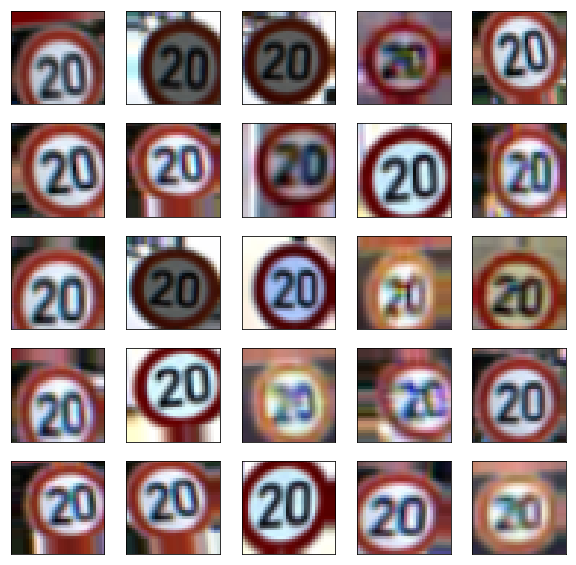

In [15]:
fig, axarr = plt.subplots(5,5, figsize=(10,10))
samples = X_train[y_train==0,...]
nbaseimages = np.random.choice(np.arange(0,100), size=25, replace=True)
for k in range(25):
    baseimage = samples[nbaseimages[k]]
    newimage = transform.warp(baseimage, \
                              transform.AffineTransform(scale=(random.uniform(0.9,1.1),random.uniform(0.9,1.1)),\
                                          rotation=random.uniform(-5,5)*np.pi/180, \
                                          shear=random.uniform(-5,5)*np.pi/180,\
                                          translation=(random.uniform(-3,3),random.uniform(-3,3))),mode='edge') 
    irow = int(k/5)
    icol= k%5
    axarr[irow,icol].imshow(newimage) 
    axarr[irow,icol].axes.get_xaxis().set_visible(False)
    axarr[irow,icol].axes.get_yaxis().set_visible(False)

####  [Pre-process] Image Augmentation and Normalization

Suplementrary images are added to original train dataset. For each "minor" class, i.e. class with less images, original images in the training dataset are selected randomly, underthrough scaling, rotation, shearing and translation to generate complementary images up to the size of 0.9 of the class with maximum sample size.

In [12]:
# preprocess and balance the data

n=histtrain
arithMean_n = np.mean(n)
nMajorClasses = sum(n>arithMean_n)
nUpto = np.floor(0.9 * max(n)).astype(int)
sortedindex = sorted(range(len(n)), key=lambda k: n[k])
sortedn = n[sortedindex]
classtofill = sortedn<nUpto
iclasstofill = [i for i, x in enumerate(sortedn) if x<nUpto]

In [13]:
for i in iclasstofill:
    samples = X_train[y_train==sortedindex[i],...]
    nToFill = nUpto - sortedn[i]
    nbaseimages = np.random.choice(np.arange(0,sortedn[i]), size=nToFill, replace=True)
    for k in range(nToFill):
        baseimage = samples[nbaseimages[k]]
        newimage = transform.warp(baseimage, \
                                  transform.AffineTransform(scale=(random.uniform(0.9,1.1),random.uniform(0.9,1.1)),\
                                              rotation=random.uniform(-5,5)*np.pi/180, \
                                              shear=random.uniform(-5,5)*np.pi/180,\
                                              translation=(random.uniform(-3,3),random.uniform(-3,3))),mode='edge')  
        X_train=np.append(X_train,[newimage],axis=0)
        y_train=np.append(y_train,[sortedindex[i]],axis=0)
    print("finish class {0:d}".format(sortedindex[i]))    
    
n_train_new = len(X_train)

finish class 0
finish class 19
finish class 37
finish class 27
finish class 32
finish class 41
finish class 42
finish class 24
finish class 29
finish class 21
finish class 39
finish class 20
finish class 40
finish class 22
finish class 36
finish class 6
finish class 16
finish class 34
finish class 30
finish class 23
finish class 28
finish class 15
finish class 26
finish class 33
finish class 14
finish class 31
finish class 17
finish class 18
finish class 35
finish class 11
finish class 3
finish class 8
finish class 7
finish class 9
finish class 25
finish class 5
finish class 4
finish class 10


In [14]:
# crop image area within ROI, and enlarge it
for ipic in range( n_train_new):    
     X_train[ipic] = normalize(X_train[ipic].squeeze())
    
for ipic in range( n_validation):    
    X_valid[ipic] = normalize(X_valid[ipic].squeeze())

for ipic in range( n_test):
    X_test[ipic] = normalize(X_test[ipic].squeeze())

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


In [15]:
EPOCHS = 100
BATCH_SIZE = 128 

In [16]:
from tensorflow.contrib.layers import flatten

def LeNet(x,keep_prob3,keep_prob4):    
    #print(x.shape)   
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    #conv1 = tf.nn.dropout(conv1, keep_prob1)

    # Pooling. Input = 28x28x12. Output = 14x14x12    .
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
       
    # SOLUTION: Layer 2: Convolutional. 14x14x20  Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    #conv2 = tf.nn.dropout(conv2, keep_prob2)

    # SOLUTION: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 360), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(360))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob3)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(360, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob4)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1, conv2

In [17]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)
keep_prob3 = tf.placeholder(tf.float32)
keep_prob4 = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


In [18]:
rate = 0.001

logits, conv1, conv2 = LeNet(x,keep_prob3,keep_prob4)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

accValid=[]
accTrain=[]
lossValid=[]
lossTrain=[]

In [19]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss,accuracy = sess.run([loss_operation,accuracy_operation], feed_dict={x: batch_x, y: batch_y,keep_prob3:1,keep_prob4:1})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss/num_examples


In [20]:
from sklearn.utils import shuffle
goodpoint = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        pre_accuracy=-1
        X_train, y_train = shuffle(X_train, y_train)
        
        training_accuracy = 0
        training_loss = 0        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob3:0.5,keep_prob4:0.5})
            loss,accuracy = sess.run([loss_operation,accuracy_operation], feed_dict={x: batch_x, y: batch_y,keep_prob3:0.5,keep_prob4:0.5})
            training_accuracy += (accuracy * len(batch_x))
            training_loss += (loss * len(batch_x))
        training_accuracy = training_accuracy/len(X_train) 
        training_loss = training_loss/len(X_train)
            
        validation_accuracy, validation_loss = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
       # if i % 2 is 0:
        accTrain.append(training_accuracy)
        lossTrain.append(training_loss)
        accValid.append(validation_accuracy)
        lossValid.append(validation_loss)
        
        if validation_accuracy>0.95:
            if pre_accuracy<0 or pre_accuracy>0.95:
                goodpoint +=1
                if goodpoint>10:
                    break
        else:            
            goodpoint=0
                
        pre_accuracy=validation_accuracy
        print("goodpoint: {}".format(goodpoint))
    saver = tf.train.Saver()
    saver.save(sess, './lenet.chkp')
    
    print("Model saved")




Training...

EPOCH 1 ...
Validation Accuracy = 0.112

goodpoint: 0
EPOCH 2 ...
Validation Accuracy = 0.348

goodpoint: 0
EPOCH 3 ...
Validation Accuracy = 0.442

goodpoint: 0
EPOCH 4 ...
Validation Accuracy = 0.451

goodpoint: 0
EPOCH 5 ...
Validation Accuracy = 0.486

goodpoint: 0
EPOCH 6 ...
Validation Accuracy = 0.541

goodpoint: 0
EPOCH 7 ...
Validation Accuracy = 0.633

goodpoint: 0
EPOCH 8 ...
Validation Accuracy = 0.691

goodpoint: 0
EPOCH 9 ...
Validation Accuracy = 0.754

goodpoint: 0
EPOCH 10 ...
Validation Accuracy = 0.802

goodpoint: 0
EPOCH 11 ...
Validation Accuracy = 0.794

goodpoint: 0
EPOCH 12 ...
Validation Accuracy = 0.848

goodpoint: 0
EPOCH 13 ...
Validation Accuracy = 0.861

goodpoint: 0
EPOCH 14 ...
Validation Accuracy = 0.883

goodpoint: 0
EPOCH 15 ...
Validation Accuracy = 0.906

goodpoint: 0
EPOCH 16 ...
Validation Accuracy = 0.910

goodpoint: 0
EPOCH 17 ...
Validation Accuracy = 0.910

goodpoint: 0
EPOCH 18 ...
Validation Accuracy = 0.896

goodpoint: 0
EPOCH 

In [21]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet.chkp.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, test_loss = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.921


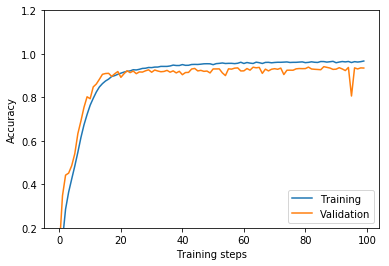

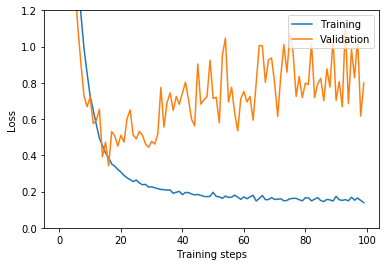

In [22]:
fig, ax = plt.subplots()

ax.plot(range(0,len(lossValid)),accTrain, label='Training')
ax.plot(range(0,len(lossValid)),accValid, label='Validation')
ax.set_xlabel('Training steps')
ax.set_ylabel('Accuracy')
ax.set_ylim([0.2,1.2])
ax.legend(loc=4)
fig.savefig('Accuracy.png')    


fig, ax = plt.subplots()

ax.plot(range(0,len(lossValid)),lossTrain, label='Training')
ax.plot(range(0,len(lossValid)),lossValid, label='Validation')
ax.set_xlabel('Training steps')
ax.set_ylabel('Loss')
ax.set_ylim([0,1.2])
ax.legend(loc=1)
plt.show()
fig.savefig('Loss.png')    


Wish extra images added to the original training dataset, the results are extremely worse.